# Box model for stable carbon isotope mass balance

* * * 
### _Import necessary libraries:_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import json
import requests
import pandas as pd
import math

* * *
### _Define parameters for inputs:_

In [7]:
#####Fluxes
F_riv=.6 #Gt/yr; combined riverine input
F_oc_carb=.4#Gt/yr marine carbonate carbon burial flux
F_oc_org=F_riv-F_oc_carb #Gt/yr marine organic carbon burial flux

#F_atm_oc=90 #Gt/yr; sea-air gas exchange
#F_oc_atm=90 #Gt/yr; sea-air gas exchange

#####Reservoir masses
M_ocean=38000#GtC

#atm_ppm=350#approximation from compilations in Steinthorshaddir et al., 2020
#M_atm=2.13*atm_ppm #convert from ppm to Gt C

#####Initial d13C
d13C_riv=-6#composition of total riverine input
d13C_ocean=0 #initial composition of DIC; benthic foraminifera, from U1264, Steinthorshaddir et al., 2020.
d13C_org=-25

#d13Catm_init=-6
#d13C_volc=5 #composition of volcanigenic CO2
#d13C_atm= -6#((d13Catm_init*M_atm)+(d13C_volc*F_volc*100000))/(M_atm+F_volc*100000) #initial preanthropogenic carbon isotopic composition of atmosphere
###Process fractionation:
#atm_to_ocean=-2 #fractionation from atmosphere to ocean, Siegenthaller and Munnich,1981
#ocean_to_atm=-9 #fractionation from ocean to atmosphere



### _Define parameters to use in non-steady-state eq:_

In [8]:
Res_time_ocean=M_ocean/(F_riv)
SS_Mass=(M_ocean+F_riv-F_oc_carb-F_oc_org)
SS_Mass,Res_time_ocean #print values to test


(38000.0, 63333.333333333336)

In [9]:
#steady state 
Ocean_ss=((F_riv*d13C_riv)-(F_oc_carb*d13C_ocean)-(F_oc_org*d13C_org))/(M_ocean+F_riv-F_oc_carb-F_oc_org) 
print(Ocean_ss)

3.684210526315788e-05


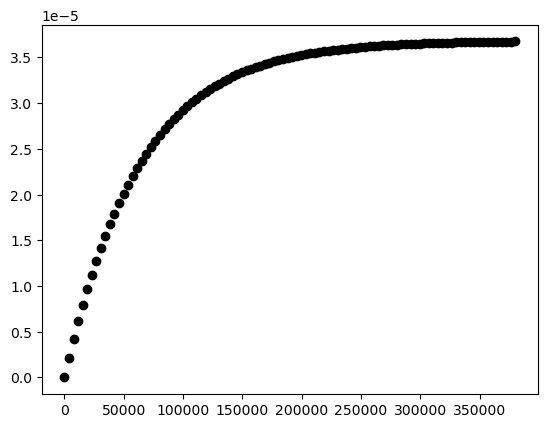

In [10]:
#Introduce time dependency
t=np.linspace(0,(int(Res_time_ocean)*6),100) #define a range of values spanning 6 times the res time of C in the ocean, at 100 year increments).
for i in range(0,len(t)): #for each time step value defined above, calculate the d13C of the ocean at steady state for each timestep
    x=t[i] #fill an array with all timestep values defined by t

    y=Ocean_ss-((Ocean_ss-d13C_ocean)*(math.exp((-t[i]-0)/Res_time_ocean))) #calculate y, or steady-state isotopic composition at each timestep t[i]

    plt.scatter(x,y,color='k') #plot x vs y

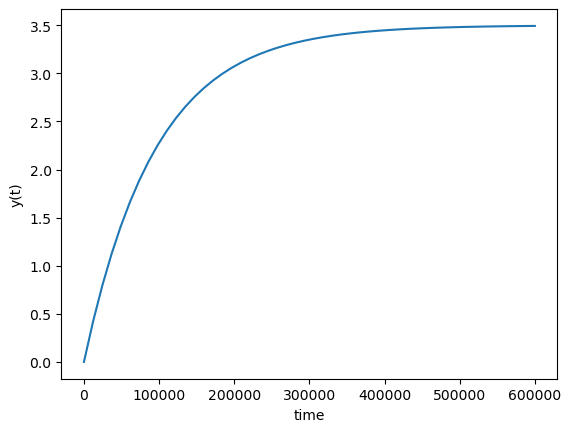

In [23]:
#Non-steady-state
import numpy as np
from scipy.integrate import odeint #import ODE solver
import matplotlib.pyplot as plt

#define variables
d13C_riv=-6
d13C_org=-25

F_riv=.6
F_oc_org=.2
F_oc_carb=F_riv-F_oc_org

M_ocean=38000

def model(y,t):

    dydt=((F_riv*(d13C_riv))-((F_oc_carb*(y))+(F_oc_org*(d13C_org))))/(M_ocean) 
    return dydt

# initial condition
y0 = 0

# time points
t = np.linspace(0,600000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()


* * * 
* * *
### _F_org:_
* * *

In [11]:
d13C_riv=-6
d13C_org=-23

Forg_normal=(d13C_riv-.5)/(d13C_org-.5)
Forg_normal

0.2765957446808511

In [12]:
Forg_Monterey=(d13C_riv-1.5)/(d13C_org-1.5)
Forg_Monterey

0.30612244897959184

In [13]:
diff=Forg_Monterey-Forg_normal
diff

0.02952670429874077

In [14]:
Res_time_ocean=M_ocean/(F_riv)
Res_time_ocean

63333.333333333336

In [15]:
Res_time_ocean*5

316666.6666666667

In [16]:
.6*diff

0.01771602257924446

###### 35432/12000000


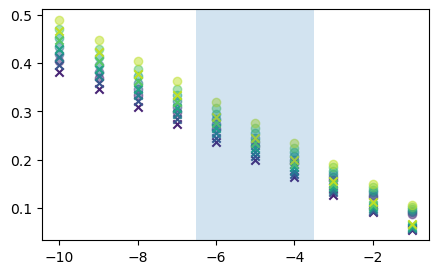

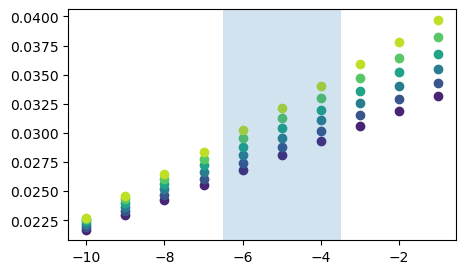

In [17]:
d13c_rivrange=[*range(-10,0)]
d13c_orgrange=[-27,-26,-25,-24,-23,-22]
org_cmap = plt.get_cmap('viridis')
org_val_colors=org_cmap(np.linspace(.1, .9, len(d13c_orgrange))) 

MontereyForg=plt.figure(figsize=(5,3))#set figure dimensions
for i in range(0, len(d13c_rivrange)):
    for j in range(0,len(d13c_orgrange)):
        d13C_riv=d13c_rivrange[i]
        d13C_org=d13c_orgrange[j]

        Forg_normal=(d13C_riv-.5)/(d13C_org-.5)
        Forg_Monterey=(d13C_riv-1.5)/(d13C_org-1.5)

        diff=Forg_Monterey-Forg_normal
        
        plt.scatter(d13C_riv,Forg_Monterey,color=org_val_colors[j],alpha=.5)
        plt.scatter(d13C_riv,Forg_normal,marker='x',color=org_val_colors[j])
plt.axvspan(-6.5,-3.5, alpha=.2)
        
        
ForgDiff=plt.figure(figsize=(5,3))#set figure dimensions       
for i in range(0, len(d13c_rivrange)):
    for j in range(0,len(d13c_orgrange)):
        d13C_riv=d13c_rivrange[i]
        d13C_org=d13c_orgrange[j]

        Forg_normal=(d13C_riv-.5)/(d13C_org-.5)
        Forg_Monterey=(d13C_riv-1.5)/(d13C_org-1.5)

        diff=Forg_Monterey-Forg_normal
        
      
        plt.scatter(d13C_riv,diff,color=org_val_colors[j])
plt.axvspan(-6.5,-3.5, alpha=.2)      
       



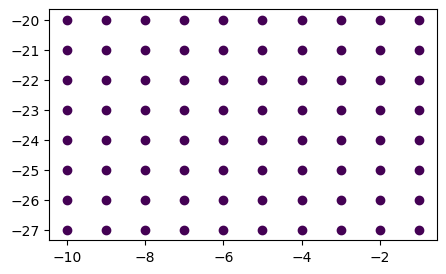

In [22]:
d13c_rivrange=[*range(-10,0)]
d13c_orgrange=[-27,-26,-25,-24,-23,-22,-21,-20]
vcmap = plt.get_cmap('viridis')
 
ForgDiff=plt.figure(figsize=(5,3))#set figure dimensions       
for i in range(0, len(d13c_rivrange)):
    for j in range(0,len(d13c_orgrange)):
        d13C_riv=d13c_rivrange[i]
        d13C_org=d13c_orgrange[j]

        Forg_normal=(d13C_riv-.5)/(d13C_org-.5)
        Forg_Monterey=(d13C_riv-1.5)/(d13C_org-1.5)

        diff=Forg_Monterey-Forg_normal
        
      
        plt.scatter(d13C_riv,d13C_org,c=diff,cmap=vcmap)

#plt.axvspan(-6.5,-3.5, alpha=.2)      
       


In [24]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show


d13c_riv=[*range(-10,0,.1)]
d13c_org=[-27,-26,-25,-24,-23,-22,-21,-20]

def z_func(d13C_riv,d13C_org):
    Forg_normal=(d13C_riv-.5)/(d13C_org-.5) #calculate Forg when d13Ccarb=.5
    Forg_Monterey=(d13C_riv-1.5)/(d13C_org-1.5)#calculate Forg when d13Ccarb=1.5
    diff=Forg_Monterey-Forg_normal #calculate difference in Forg between the two scenarios above
    add_orgC_flux=diff*.6 #multiply fractional change in fOrg by estimate of total C flux, in Gt/yr
    area=600000 #burial area, in km2. 600,000 for all circum-pacific basins(Vincent and Berger, 1985); 180,000 for Monterey Fm basins.
    areaflux=add_orgC_flux/area
    stoich=areaflux*(100000000000)
    return stoich
    
    
x=d13c_riv
y=d13c_org

X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid
# latex fashion title
title('Additional burial flux in circum-Pacific basins')
plt.contourf(X, Y, Z)
colorbar() # adding the colobar on the right
show()

TypeError: 'float' object cannot be interpreted as an integer

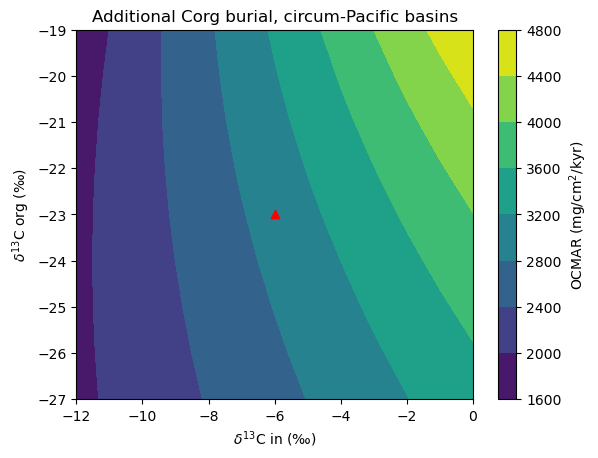

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [25]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show


d13c_in=[range(-12,1)]
d13c_org=[range(-27,-18)]

def z_func(d13C_in,d13C_org):
    Forg_normal=(d13C_in-.5)/(d13C_org-.5) #calculate Forg when d13Ccarb=.5
    Forg_Monterey=(d13C_in-1.5)/(d13C_org-1.5)#calculate Forg when d13Ccarb=1.5
    
    
    diff=Forg_Monterey-Forg_normal #calculate difference in Forg between the two scenarios above
    add_orgC_flux=diff*.6 #multiply fractional change in fOrg by estimate of total C flux, in Gt/yr
    area=600000 #area of Monterey Fm basins, in km2
    areaflux=add_orgC_flux/area #determine C flux per unit area
    stoich=areaflux*(100000000000)#turn GtC/yr/km2 into mg/cm2/kyr
    return stoich
    
 
x=d13c_in
y=d13c_org

X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

title('Additional Corg burial, circum-Pacific basins')
plt.contourf(X, Y, Z)
cbar=colorbar() 
cbar.set_label('OCMAR (mg/cm$^{2}$/kyr)')
plt.scatter(-6,-23,marker='^',color='r')
plt.xlabel('$\delta^{13}\mathrm{C}$ in (‰)')
plt.ylabel('$\delta^{13}\mathrm{C}$ org (‰)')
show()

plt.savefig